In [40]:
# Import modules

# data processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# color dictionary
color_dict = {
    'Yes': '#00FF00', 
    'No': '#FF0000', 
    'Sometimes': '#FFFF00', 
    'Never': '#90EE90', 
    'Rarely': '#FFC0CB', 
    'Often': '#FFA500', 
    "Don't know": '#0000FF', 
    'Unknown': '#0000FF' 
}

In [42]:
# Loading the dataset
def get_original_data():
    file = 'survey.csv'
    df = pd.read_csv(file)
    return df

df = get_original_data()

# The num of rows and columns of dataset
print("Data Shape:", df.shape)

# The type of columns
# print(df.info())

Data Shape: (1259, 27)


In [44]:
# Remove unused columns
df = df.drop(['Timestamp','Country','state','comments'], axis = 1)
df.head(5)

# Check for null values in each column
columnStr = 'column'
mcStr = 'missing count'
print(f"{columnStr:<25} {mcStr}")

for col in df:
    missing_count = df[col].isnull().sum()
    print(f"{col:<30} {missing_count}")

# Assign all empty values to 'NaN'
df['self_employed'] = df['self_employed'].fillna('NaN')
df['work_interfere'] = df['work_interfere'].fillna('NaN')
df.head(5)

# Replace 'NaN' in 'self_employed' column
print(df['self_employed'].value_counts(), "\n")
df['self_employed'] = df['self_employed'].replace(['NaN'], 'No')

# Replace 'NaN' in 'work_interfere' column
print(df['work_interfere'].value_counts())
df['work_interfere'] = df['work_interfere'].replace('NaN', 'Unknown')

# Clean gender
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'cis man', 'Guy']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'cis woman']:
        return 'Female'
    elif 'trans' in gender and 'male' in gender:
        return 'transMale'
    elif 'trans' in gender and 'female' in gender:
        return 'transFemale'
    elif gender in ['non-binary', 'nonbinary', 'nb', 'genderqueer', 'gender fluid']:
        return 'Other'
    else:
        return 'Other'  

df['Gender'] = df['Gender'].apply(clean_gender)
print(df['Gender'].value_counts())

# Clean age
print("min age", df['Age'].min())
print("max age", df['Age'].max())

age_series = pd.Series(df['Age'])
age_median = age_series.median()
age_series[age_series <= 18] = age_median
age_series[age_series >= 100] = age_median
df['Age'] = age_series

print("min age", df['Age'].min())
print("max age", df['Age'].max())

column                    missing count
Age                            0
Gender                         0
self_employed                  18
family_history                 0
treatment                      0
work_interfere                 264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64 

work_interfere
Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: count, dtype: 

In [76]:
def visualize_gender_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Gender', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
    plt.title("Gender Distribution After Cleaning")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

def visualize_age_distribution(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Age'], kde=True, bins=30)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

def visualize_gender_vs_treatment(df, color_dict):
    plt.figure(figsize=(8, 5))
    colors = [color_dict.get(label) for label in ['No', 'Yes']]
    sns.countplot(data=df, x='Gender', hue='treatment', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'], palette=colors)
    plt.title("Gender vs. Mental Health Treatment")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.legend(title="Sought Treatment", labels=["No", "Yes"])
    plt.show()

def visualize_pie_charts_by_gender(df, color_dict):
    gender_categories = ['Male', 'Female', 'transMale', 'Other']
    t_df = df[df['Gender'].isin(gender_categories)]
    plt.figure(figsize=(9, 5))
    for i, gender in enumerate(gender_categories, 1):
        plt.subplot(2, 3, i)
        treatment_counts = t_df[t_df['Gender'] == gender]['treatment'].value_counts()
        colors = [color_dict[label] for label in treatment_counts.index]
        plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Mental Health Treatment - {gender}")
    plt.tight_layout()
    plt.show()

def visualize_work_interference(df, color_dict):
    plt.figure(figsize=(10, 6))
    gender_categories = ['Male', 'Female', 'transMale', 'Other']
    for i, gender in enumerate(gender_categories, 1):
        plt.subplot(2, 3, i)
        interfere_counts = df[df['Gender'] == gender]['work_interfere'].value_counts()
        colors = [color_dict[label] for label in interfere_counts.index]
        plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Work Interference - {gender}")
    plt.tight_layout()
    plt.show()

# Define the boundaries of age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

# Group the age column 'Age' by the defined boundaries and store the results in a new column 'age_group'
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Define the boundaries of company size
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

def visualize_age_group_distribution(df, bins, labels, color_dict):
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
    plt.figure(figsize=(10, 5))
    colors = [color_dict.get(label) for label in ['No', 'Yes']]
    sns.countplot(data=df, x='age_group', hue='treatment', palette=colors)
    plt.title("Age Group vs. Mental Health Treatment")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.legend(title="Sought Treatment", labels=["No", "Yes"])
    plt.show()

    plt.figure(figsize=(10, 6))
    for i, age_group in enumerate(labels, 1):
        plt.subplot(2, 3, i)
        interfere_counts = df[df['age_group'] == age_group]['work_interfere'].value_counts()
        colors = [color_dict[label] for label in interfere_counts.index]
        plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Work Interference - Age {age_group}")
    plt.tight_layout()
    plt.show()

def visualize_company_size_vs_benefits(df, employee_order, color_dict):
    fig, axes = plt.subplots(2, 3, figsize=(10, 5))
    fig.suptitle("Mental Health Benefits by Company Size")
    for i, size in enumerate(employee_order):
        data_size = df[df['no_employees'] == size]
        benefit_counts = data_size['benefits'].value_counts()
        colors = [color_dict[label] for label in benefit_counts.index]
        ax = axes[i // 3, i % 3]
        ax.pie(benefit_counts, labels=benefit_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(f"Company Size: {size}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def visualize_family_history_vs_treatment(df):
    plt.figure(figsize=(10, 6))
    colors = [color_dict.get(label) for label in ['No', 'Yes']]
    sns.countplot(data=df, x='family_history', hue='treatment', palette=colors)
    plt.title("Family History vs. Mental Health Treatment")
    plt.xlabel("Family History")
    plt.ylabel("Count")
    plt.show()

def visualize_tech_vs_benefits(df):
    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    colors = [color_dict.get(label) for label in ['No', 'Yes', "Don't know"]]
    sns.countplot(data=df, x='no_employees', hue='benefits', palette=colors)
    plt.title("Company Size vs. Access to Mental Health Benefits")
    plt.xlabel("Company Size")
    plt.ylabel("Count")

    plt.subplot(2, 2, 2)
    colors = [color_dict.get(label) for label in ['No', 'Yes', "Don't know"]]
    sns.countplot(data=df, x='tech_company', hue='benefits', palette=colors)
    plt.title("Tech Company vs. Access to Mental Health Benefits")
    plt.xlabel("Tech Company")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

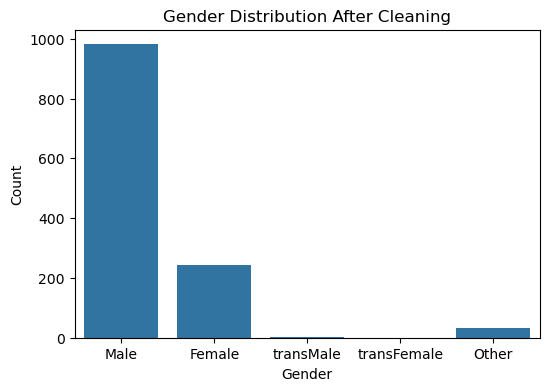

In [11]:
visualize_gender_distribution(df)

This chart illustrates the distribution of different genders in the cleaned dataset. As can be seen from the graph, males are in the majority, with close to 1,000 individuals. There are significantly fewer females, about 200. There are very few cross-male, cross-female and other gender entries.

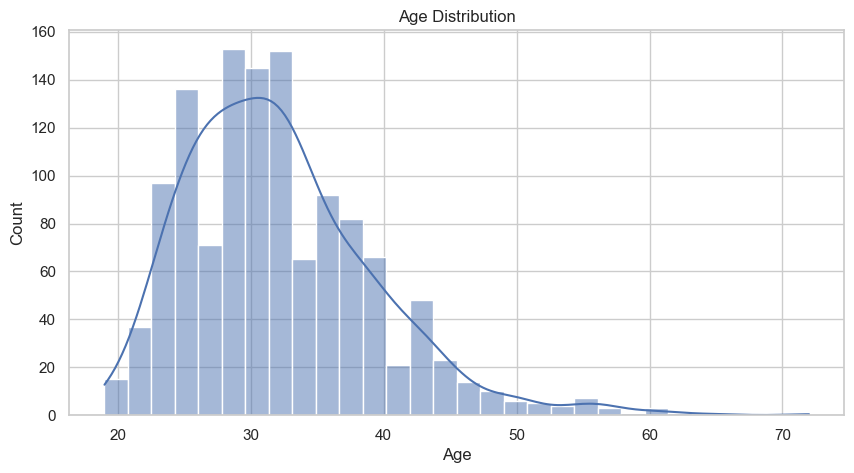

In [13]:
visualize_age_distribution(df)

The graph depicts the age distribution in the dataset. As can be seen from the figure, the majority of individuals are between the ages of 20 and 40, with a positively skewed distribution (right tail). The peak occurs around the age of 30, with nearly 150 individuals, and the number of individuals decreases with age. there are very few individuals over the age of 60, indicating that the dataset consists mainly of young and middle-aged individuals.

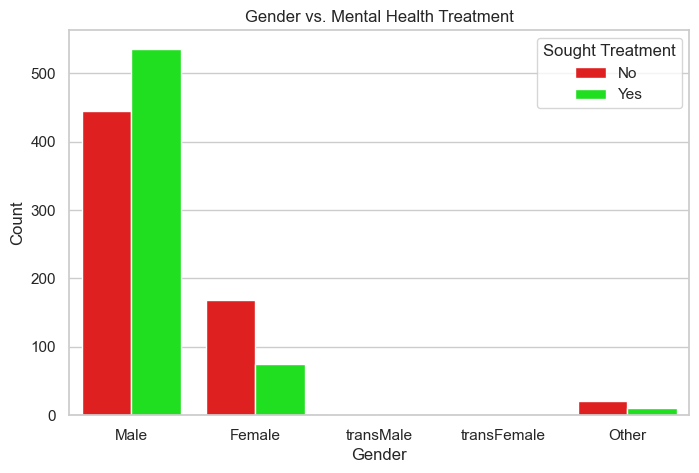

In [56]:
visualize_gender_vs_treatment(df, color_dict)

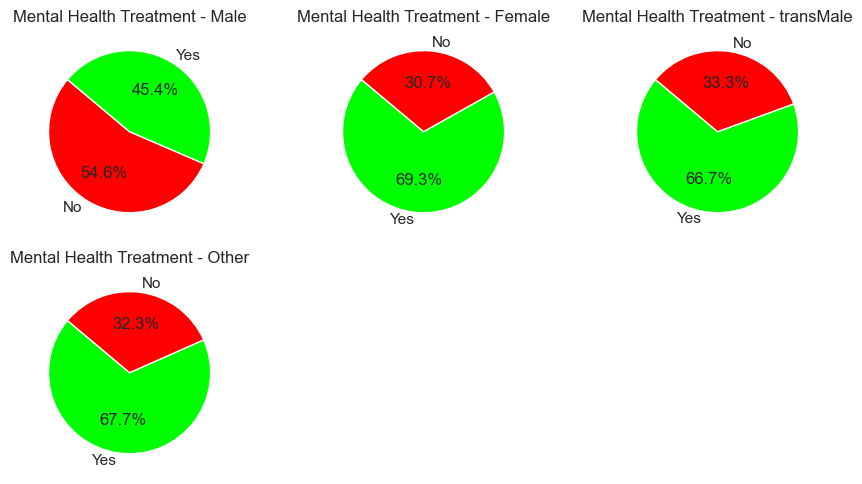

In [58]:
visualize_pie_charts_by_gender(df, color_dict)

This set of pie charts shows the proportion of people in different gender groups seeking mental health treatment, with a higher proportion of women and transgender people seeking mental health treatment than men, and a relatively low proportion of men seeking mental health treatment.

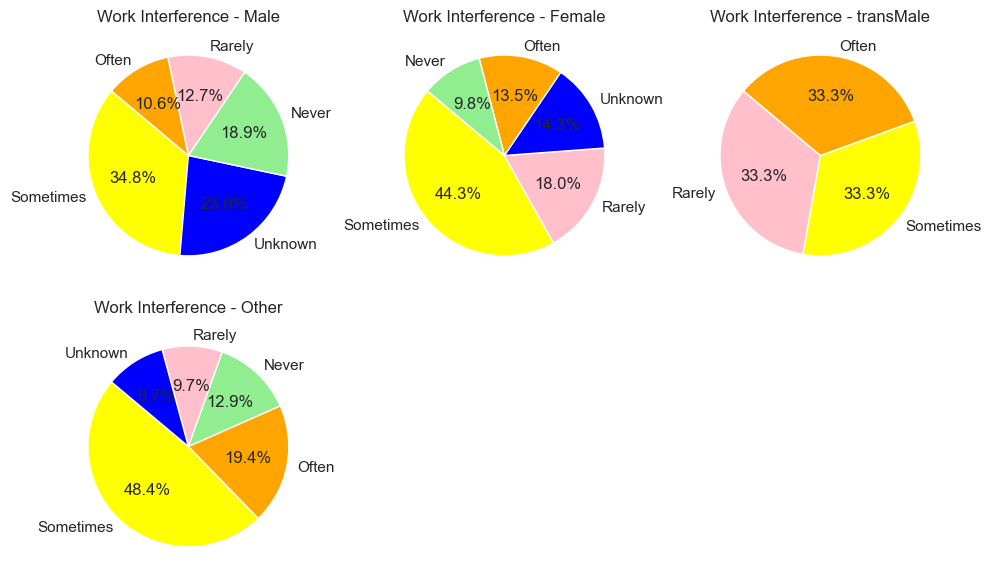

In [60]:
visualize_work_interference(df, color_dict)

This set of pie charts reveals differences between genders in how mental health problems interfere with work. Among women, “never” (9.8%) is the least common, suggesting that women are less likely to report no interference at all. “Often” was 13.5%, slightly higher than for men.

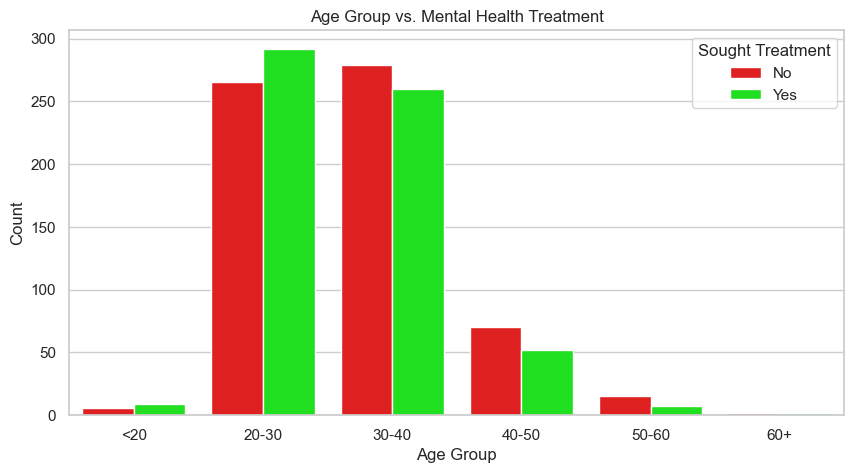

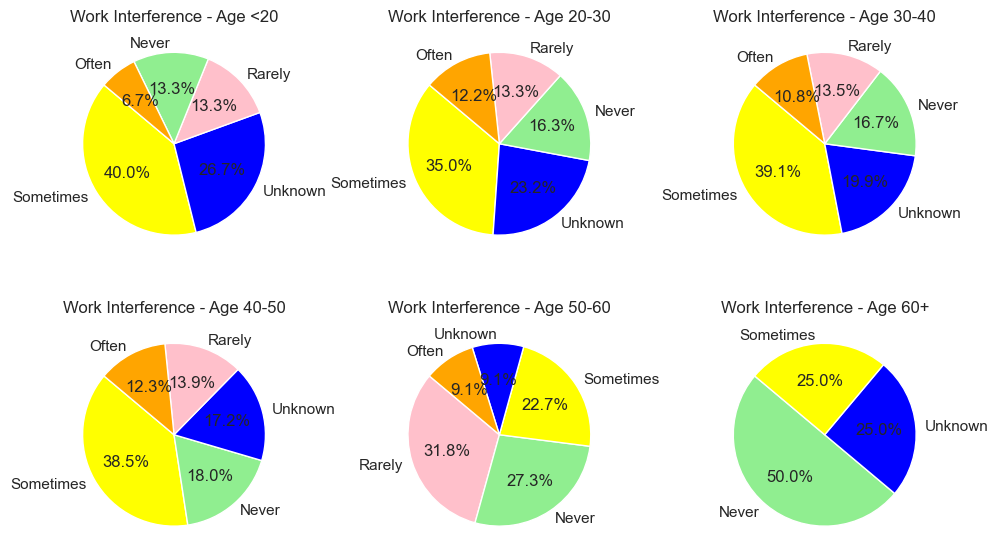

In [66]:
visualize_age_group_distribution(df, bins, labels, color_dict)

This set of pie charts reveals different patterns of work disruption due to mental health problems across different age groups.
The highest proportions of 'often' were found in the 20-30 and 40-50 age groups (12.2% and 12.3%), while 'never' was found in the 60 and over age group at a high level of 50.0%. This suggests that the impact of mental health problems on work is more pronounced in the younger age groups, while the interference is diminished in the older age groups.

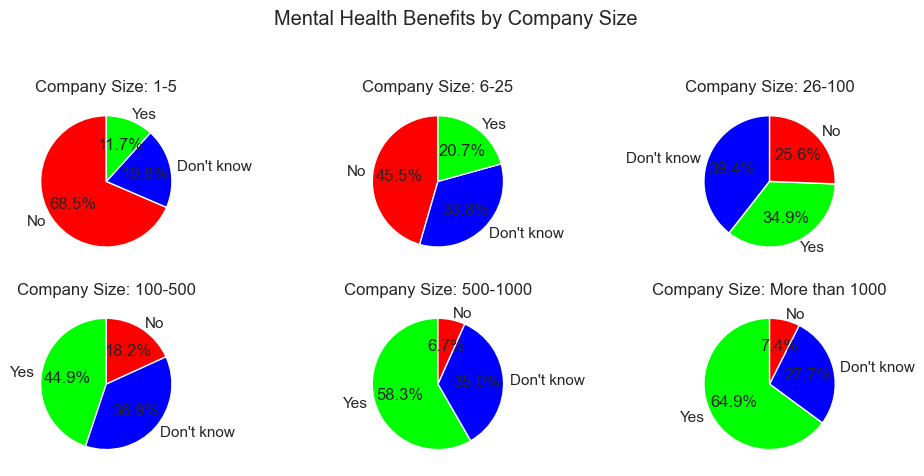

In [68]:
visualize_company_size_vs_benefits(df, employee_order, color_dict)

This set of pie charts shows the distribution of responses from employees at companies of different sizes about whether their employer offers mental health benefits. The likelihood of an employer offering mental health benefits increases significantly as the size of the company increases, especially at companies with more than 500 employees. In contrast, employees at smaller companies (1-25 employees) are more likely to say that mental health benefits are not available or are unsure if they are available.

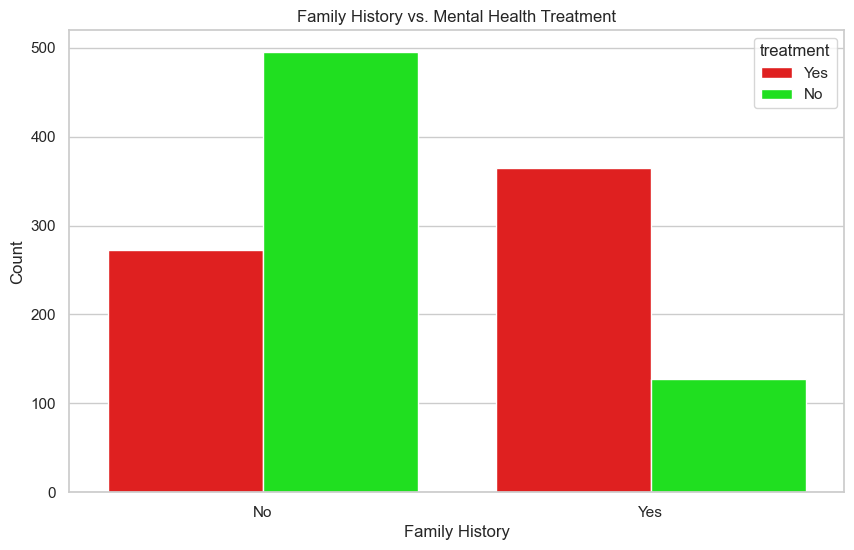

In [72]:
visualize_family_history_vs_treatment(df)

This bar graph illustrates the impact of having a family history of mental health problems on seeking mental health treatment. Individuals with a family history of mental health problems are much more likely to seek mental health treatment, while those without a family history are much less likely to seek mental health treatment. This suggests that having a family history may be an important factor in treatment-seeking behavior.

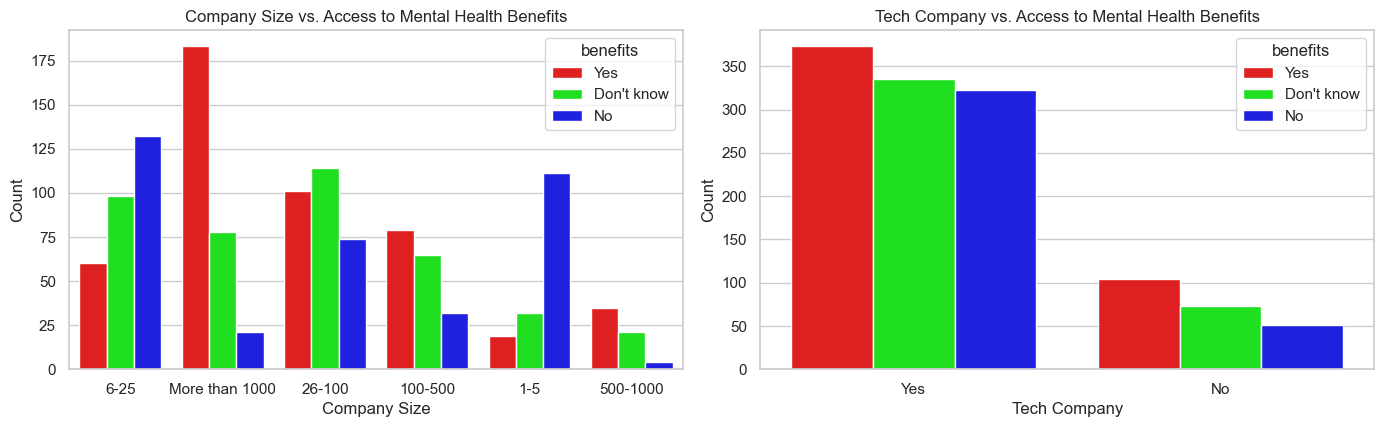

In [78]:
visualize_tech_vs_benefits(df)